In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFile
import tqdm
import itertools

In [ ]:
import torch

In [ ]:
!curl "https://drive.usercontent.google.com/download?id=1L9OkiQHcTffQ8vo9uMhT8eRUCsrwrZyh&confirm=xxx" -o "embset_v1.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  358M  100  358M    0     0  61.4M      0  0:00:05  0:00:05 --:--:-- 77.5M


In [ ]:
import shutil

shutil.unpack_archive('embset_v1.zip')

In [ ]:
!pip install ultralytics==8.3.40

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 25.3 MB/s eta 0:00:00


In [ ]:
def make_dataset_yaml():
    content = '''
path: /content
train: train/images # train images (relative to 'path')
val: val/images # val images (relative to 'path')
# test:

names:
    0: obj'''
    with open('data.yaml', 'w') as f:
        f.write(content)

make_dataset_yaml()
with open('data.yaml', 'r') as f:
    print(f.read())


path: /content
train: train/images # train images (relative to 'path')
val: val/images # val images (relative to 'path')
# test:

names:
    0: obj


In [ ]:
device = 0 if torch.cuda.is_available() else 'cpu'
device

0

In [ ]:
torch.cuda.device_count()

1

In [ ]:
from ultralytics import YOLO

epochs = 30
model = YOLO("yolo11n.pt")

train_results = model.train(
    data="/content/data.yaml",  # path to dataset YAML
    epochs=epochs,
    imgsz=640,
    device=device,
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 70.5MB/s]


New https://pypi.org/project/ultralytics/8.3.52 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

100%|██████████| 755k/755k [00:00<00:00, 22.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/train/labels... 5453 images, 2673 backgrounds, 0 corrupt: 100%|██████████| 5453/5453 [00:02<00:00, 2100.44it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.23 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/val/labels... 5453 images, 2673 backgrounds, 0 corrupt: 100%|██████████| 5453/5453 [00:03<00:00, 1752.14it/s]


val: New cache created: /content/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.46G      1.566      4.206      1.022         15        640: 100%|██████████| 341/341 [02:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 171/171 [00:45<00:00,  3.76it/s]


                   all       5453       2780      0.853      0.806      0.885      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.42G       1.49      1.584      1.001          9        640: 100%|██████████| 341/341 [01:48<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 171/171 [00:42<00:00,  4.02it/s]


                   all       5453       2780      0.932      0.883      0.953      0.585

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.37G      1.393      1.019     0.9845         10        640: 100%|██████████| 341/341 [01:47<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 171/171 [00:41<00:00,  4.14it/s]

                   all       5453       2780      0.915      0.911      0.958      0.605



3 epochs completed in 0.133 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 171/171 [00:43<00:00,  3.96it/s]


                   all       5453       2780      0.915      0.912      0.958      0.605
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
model.save(f'yolon11_{epochs}ep_embset_v1.pt')

other stuff

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path = model.export(device=device)

# shutil.copyfile(path, '/content/drive/MyDrive/OCEAN/models/yolo11n_20ep_embset_v1.pt')

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

PyTorch: starting from 'runs/detect/train2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.2 MB)

TorchScript: starting export with torch 2.5.1+cu121...
TorchScript: export success ✅ 1.8s, saved as 'runs/detect/train2/weights/best.torchscript' (10.4 MB)

Export complete (2.1s)
Results saved to /content/runs/detect/train2/weights
Predict:         yolo predict task=detect model=runs/detect/train2/weights/best.torchscript imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train2/weights/best.torchscript imgsz=640 data=/content/data.yaml  
Visualize:       https://netron.app


'/content/drive/MyDrive/OCEAN/models/yolo11n_20ep_embset_v1.pt'


image 1/1 /content/test/images/noiseR37_a1.JPG: 640x640 (no detections), 12.1ms
Speed: 3.5ms preprocess, 12.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


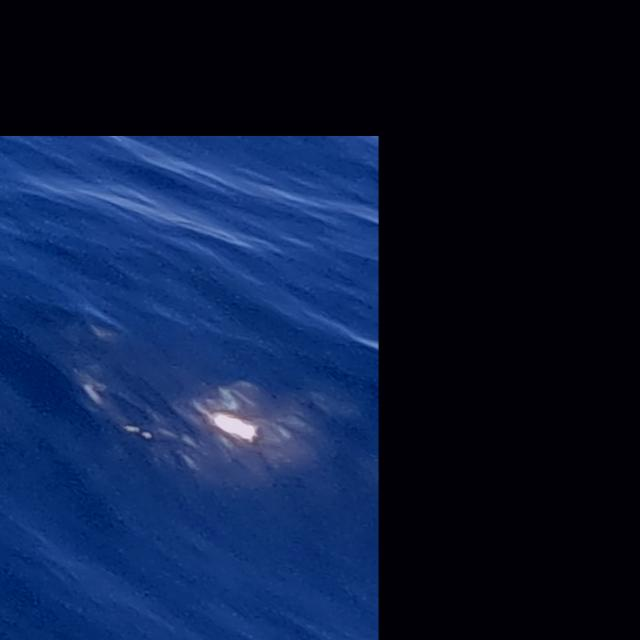

In [ ]:
result = model('test/images/noiseR37_a1.JPG')
result[0].show()

In [ ]:
model.save('saved_model.pt')

In [ ]:
unsaved_model = YOLO('saved_model.pt')

In [ ]:
unsaved_model.device

device(type='cuda', index=0)


image 1/1 /content/test/images/tar3_a1.JPG: 640x640 1 obj, 10.0ms
Speed: 2.2ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


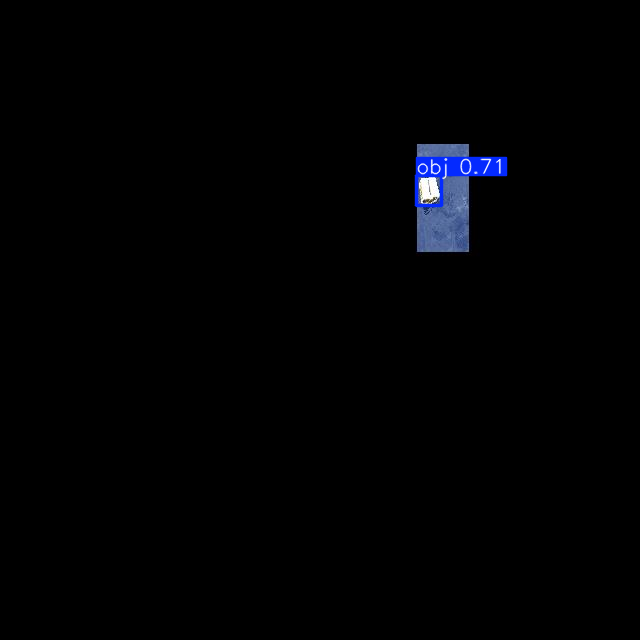

In [ ]:
res = unsaved_model('test/images/tar3_a1.JPG')
res[0].show()

In [ ]:
shutil.copyfile('saved_model.pt', '/content/drive/MyDrive/OCEAN/models/yolo11n_3ep_embset_v1.pt')

'/content/drive/MyDrive/OCEAN/models/yolo11n_3ep_embset_v1.pt'